<a href="https://colab.research.google.com/github/cbai96cbai/NEW-REPO/blob/main/sample_company_analytics_and_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from sklearn.feature_selection import RFE, SelectKBest, f_classif
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as py
from sklearn.cluster import KMeans

In [ ]:
pwd

'/Users/camillebai/Downloads'

In [ ]:
# load the dataset
data = pd.read_csv('School.csv')
#quick look of the data
print("data info:", data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18892 entries, 0 to 18891
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customer Classification  18892 non-null  object 
 1   CATEGORY                 18892 non-null  object 
 2   Purchaser_Segment        18892 non-null  object 
 3   Sub Category             18892 non-null  object 
 4   TYPE                     18813 non-null  object 
 5   PRODUCT                  18892 non-null  object 
 6   Date                     18892 non-null  object 
 7   PRODUCT_FAMILY           18892 non-null  object 
 8   SHIPPING_COUNTRY         18820 non-null  object 
 9   UNIT_COUNT               18892 non-null  int64  
 10  REVENUE                  18892 non-null  float64
dtypes: float64(1), int64(1), object(9)
memory usage: 1.6+ MB
data info: None


In [ ]:
print("data descibe", data.describe())

data descibe          UNIT_COUNT       REVENUE
count  18892.000000  1.889200e+04
mean      49.372327  1.128740e+04
std      414.688250  1.307968e+05
min        1.000000 -8.987986e+03
25%        1.000000  1.552480e+02
50%        2.000000  4.030000e+02
75%        7.000000  1.317670e+03
max    10189.000000  6.286662e+06


# clean

In [ ]:
#check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

#check for missing values and calculate percentages
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100

# combine the two Series into a DataFrame for better readability
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage %': missing_percentage})

print("Missing Values and Percentages:\n", missing_info[missing_info['Missing Values'] > 0])


Missing Values:
 Customer Classification     0
CATEGORY                    0
Purchaser_Segment           0
Sub Category                0
TYPE                       79
PRODUCT                     0
Date                        0
PRODUCT_FAMILY              0
SHIPPING_COUNTRY           72
UNIT_COUNT                  0
REVENUE                     0
dtype: int64
Missing Values and Percentages:
                   Missing Values  Percentage %
TYPE                          79      0.418166
SHIPPING_COUNTRY              72      0.381114


In [ ]:
#since the missing percentage is small, we will just drop them
data_cleaned = data.dropna()  # drop rows with missing values

#product family has dup
data_cleaned['PRODUCT_FAMILY'] = data_cleaned['PRODUCT_FAMILY'].replace({'Essential': 'Essentials'})

# convert 'Date' to datetime
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'])
data_cleaned.head()

Customer Classification    CATEGORY Purchaser_Segment  Sub Category  \
0         New Subscribers         New       per_student  New customer   
1     Expired subscribers         New    low enrollment    Cross-sell   
2     Expired subscribers         New            school    Cross-sell   
3            price change  Cross-sell       per_student    Cross-sell   
4         New Subscribers         New          district  New customer   

       TYPE   PRODUCT       Date PRODUCT_FAMILY SHIPPING_COUNTRY  UNIT_COUNT  \
0  district  BrainPOP 2024-07-31     Essentials              USA           1   
1    school     Combo 2024-07-31     Essentials              USA          14   
2    school    ESP/FR 2024-07-31     Essentials              USA           3   
3  district     Combo 2024-07-31     Essentials              USA          52   
4  district     Combo 2024-07-31     Essentials              USA          52   

       REVENUE  
0     30.50400  
1   4875.88832  
2    519.11856  
3  13202.76112  
4  22370.83628

In [ ]:
data_cleaned[data_cleaned['Customer Classification']== 'price change' ]['REVENUE'].describe()

count      4512.000000
mean       1700.003355
std       14256.076795
min       -8987.986240
25%           9.300000
50%          69.236020
75%         331.986440
max      361236.684700
Name: REVENUE, dtype: float64

In [ ]:
data_cleaned['Customer Classification'].unique()

array(['New Subscribers', 'Expired subscribers', 'price change', 'Base',
       'Extended subscribers', 'Delayed Renewal', 'Cancelled subscribers'],
      dtype=object)

In [ ]:
data_cleaned['Customer Classification'].unique()

array(['New Subscribers', 'Expired subscribers', 'price change', 'Base',
       'Extended subscribers', 'Delayed Renewal', 'Cancelled subscribers'],
      dtype=object)

In [ ]:
data_cleaned[data_cleaned['Customer Classification']=='Cancelled subscribers'].count()

Customer Classification    159
CATEGORY                   159
Purchaser_Segment          159
Sub Category               159
TYPE                       159
PRODUCT                    159
Date                       159
PRODUCT_FAMILY             159
SHIPPING_COUNTRY           159
UNIT_COUNT                 159
REVENUE                    159
dtype: int64

# EDA

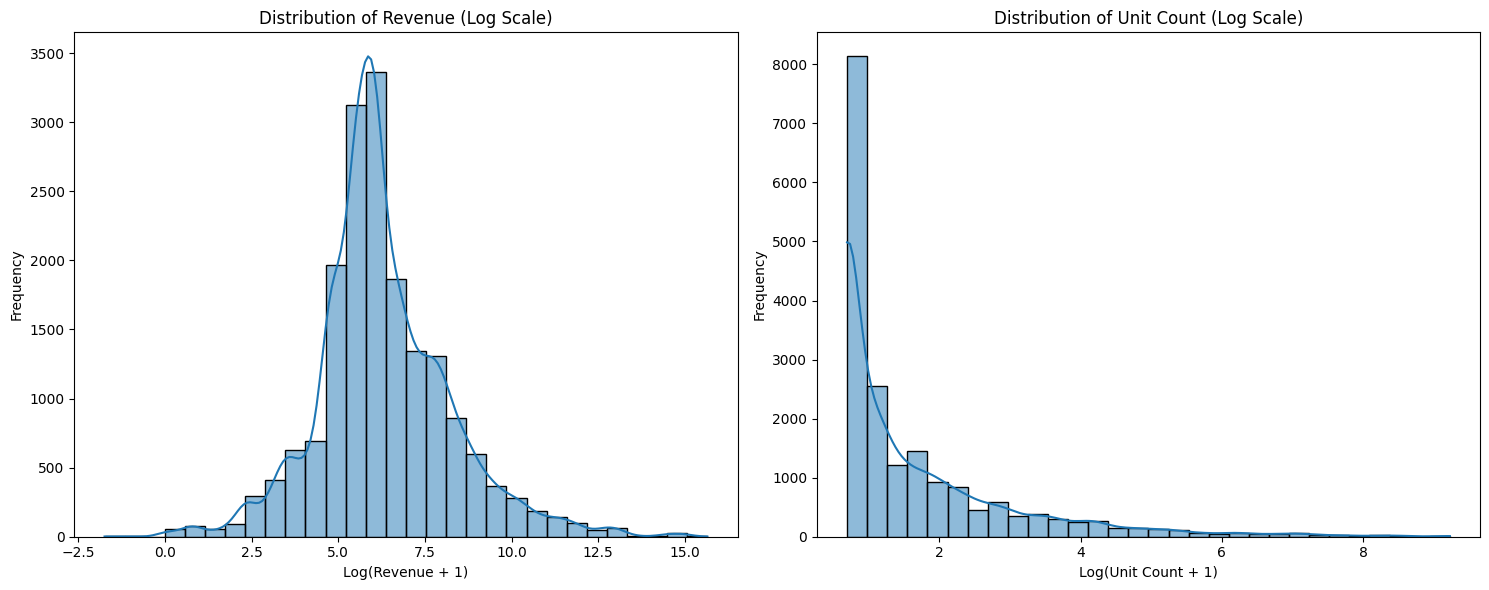

In [ ]:

# histograms for numerical features
plt.figure(figsize=(15, 6))

# Histogram for Revenue with log scale
plt.subplot(1, 2, 1)
sns.histplot(np.log1p(data_cleaned['REVENUE']), bins=30, kde=True)
plt.title('Distribution of Revenue (Log Scale)')
plt.xlabel('Log(Revenue + 1)')
plt.ylabel('Frequency')

# Histogram for Unit Count with log scale
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(data_cleaned['UNIT_COUNT']), bins=30, kde=True)
plt.title('Distribution of Unit Count (Log Scale)')
plt.xlabel('Log(Unit Count + 1)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


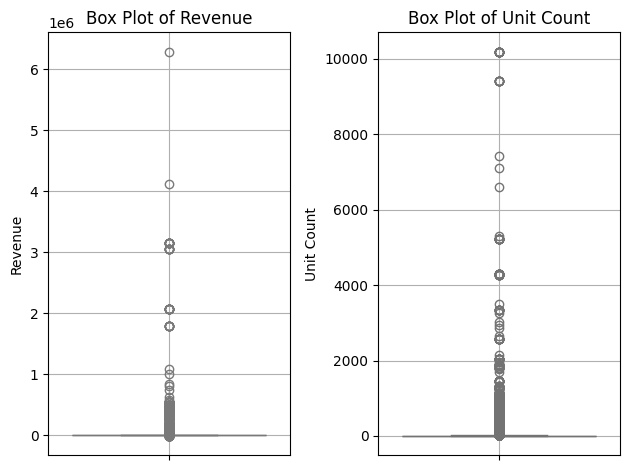

In [ ]:
#box plot for rev
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.boxplot(y=data_cleaned['REVENUE'], color='lightblue')
plt.title('Box Plot of Revenue')
plt.ylabel('Revenue')
plt.grid(True)

# box plot for unit count
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.boxplot(y=data_cleaned['UNIT_COUNT'], color='lightgreen')
plt.title('Box Plot of Unit Count')
plt.ylabel('Unit Count')
plt.grid(True)

plt.tight_layout()
plt.show()

revenue distribution:

    histogram insight: most customers generate revenue in a specific range, but a few high-revenue outliers significantly impact the overall revenue distribution.

    box plot insight: confirms the presence of outliers in the revenue data. The whiskers of the box plot show a concentration of values close to zero, while outliers extend significantly into higher revenue values. This highlights that a small number of customers are responsible for a large portion of the revenue.


unit count distribution:

    histogram insight: most customers purchase a low number of units, with a long right tail indicating a few customers who purchase in much higher volumes.

    box plot insight: while most transactions involve low unit counts, significant outliers are purchasing much larger quantities. This reinforces the opportunity for upselling or bundled product offerings to increase average unit sales.
    
    Both the histogram and box plot reveal the presence of outliers in both revenue and unit count. These outliers should be examined more closely to understand their purchasing behavior, as they may represent key high-value customers or indicate potential anomalies.
    
    
Customer segmentation: insights from the visualizations suggest that customers can be segmented into different categories:
    
    - High Revenue/High Unit Count: Customers who generate a significant amount of revenue and purchase many units.
    - Low Revenue/Low Unit Count: The majority of customers who contribute to overall sales but have low individual revenues.
    - Outlier Customers: A small group of customers who exhibit purchasing behaviors that deviate significantly from the norm, which could provide opportunities for targeted marketing or loyalty programs.

strategic recommendations:
    
    focus on High-Value Customers: retain and engage high-revenue customers.(personalized offers or loyalty programs to incentivize continued spending)    
    
    explore Opportunities for upselling: with the low average unit counts, there is potential to increase sales volume through targeted upselling strategies.
    
    investigate outlier behavior: further analyze outlier customers to understand what drives their high purchases, which may reveal insights for replicating their success across the broader customer base.


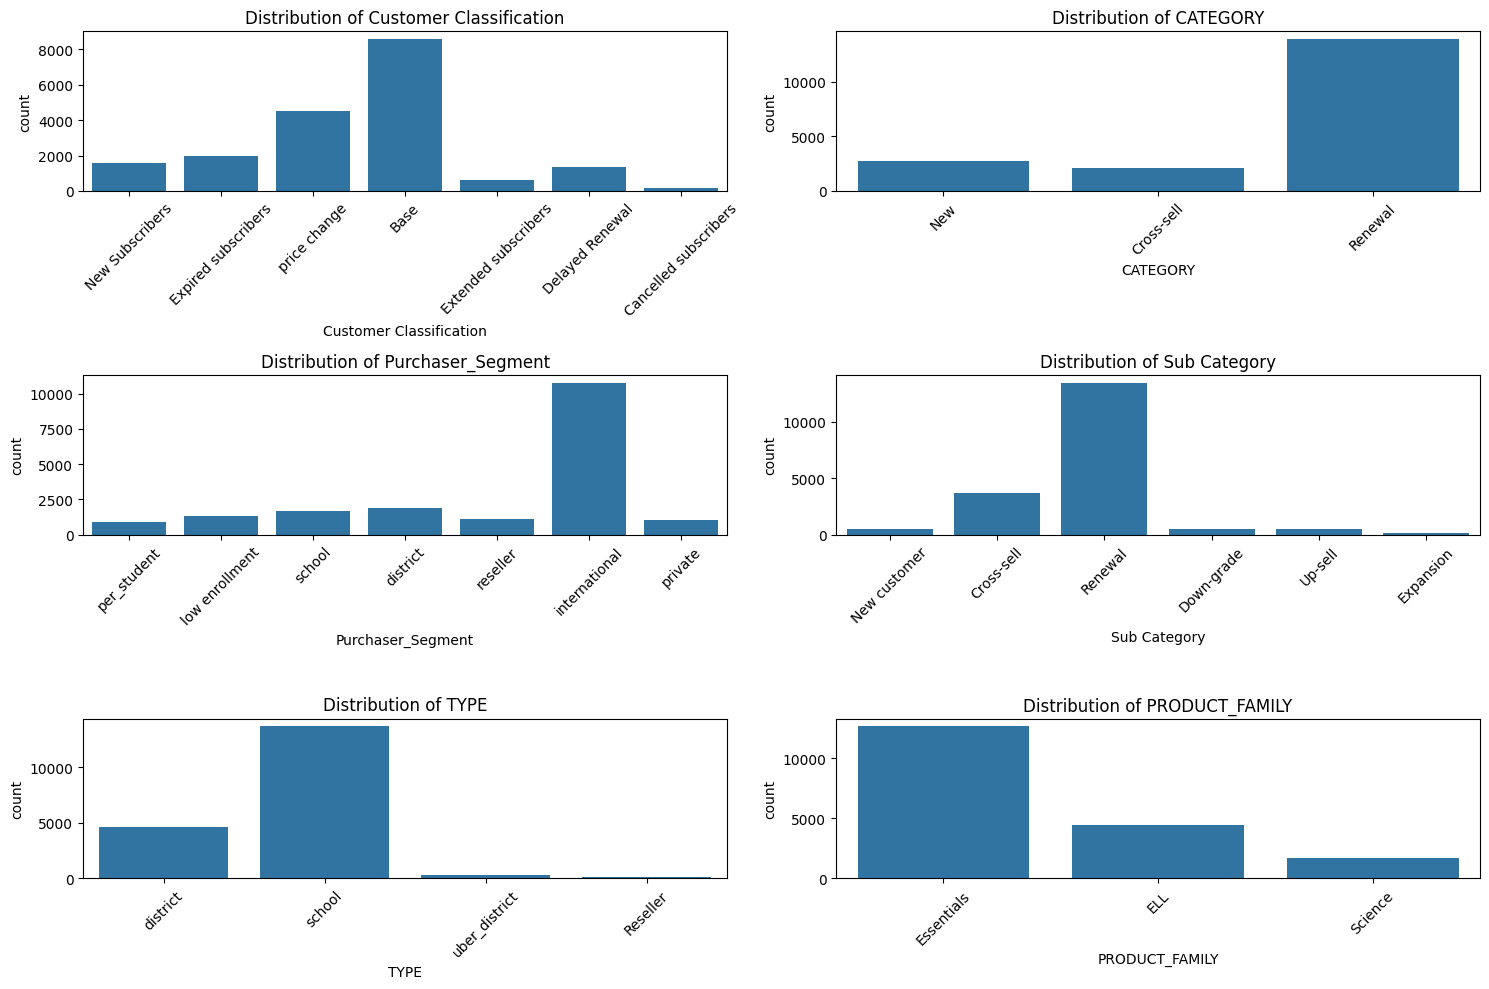

In [ ]:
# count plots for categorical variables
categorical_features = ['Customer Classification', 'CATEGORY', 'Purchaser_Segment', 'Sub Category', 'TYPE', 'PRODUCT_FAMILY']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 2, i + 1)
    sns.countplot(data=data_cleaned, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Customer Classification:

    Base: highest count, indicating that this is likely the largest segment of customers. This suggests that a significant focus should be on nurturing and retaining these customers.
    New Subscribers: The number of new subscribers is notable, indicating that there is a healthy influx of customers. It may be worthwhile to analyze their retention rates to ensure they transition into long-term customers.
    Expired Subscribers: This group could indicate potential churn. Strategies to re-engage expired subscribers may help in retaining them in the future.

Category Distribution:

    Renewal: most of the business comes from existing customers renewing their subscriptions. This indicates strong customer loyalty but also highlights the importance of ensuring high customer satisfaction to maintain this trend.
    New and Cross-sell categories are much smaller, indicating that there may be opportunities for growth in these areas, especially in marketing efforts aimed at upselling or cross-selling products.

Purchaser Segment:
    
    District and School: The predominance of these segments indicates that educational institutions are the primary customers. Tailoring products and marketing strategies to meet the needs of these segments could be beneficial.
    International: This segment also has a significant count, suggesting potential for expanding offerings or support for international clients.
    
Sub Category Distribution:

    Renewal as a sub-category has the highest count, reaffirming the importance of retaining existing customers. This emphasizes the need for effective communication and service to encourage renewals
    New customer and Cross-sell segments being lower indicates areas where more focused marketing efforts could yield results.

Product Family:
    
    Essentials: With the highest count in the product family distribution, it appears to be the most popular offering. This suggests that the core product line meets the needs of a majority of customers.
    Other product families like ELL and Science have significantly lower counts, indicating a potential area for improvement in marketing or product development to boost sales in these categories.

Strategic Recommendations:

    Focus on Retention for the Base: Given the large customer base, implementing loyalty programs or personalized outreach could help strengthen customer relationships and improve retention rates.

    Enhance New Subscriber Onboarding: Given the healthy number of new subscribers, ensuring they have a smooth onboarding experience could improve their chances of staying long-term.

    Investigate Churn Reasons: Analyzing the reasons behind expired subscriptions can provide insights into areas needing improvement.

    Expand Marketing Efforts in Underperforming Categories: There is potential for growth in the New and Cross-sell categories; consider targeted marketing campaigns to promote these options.

    Product Development for Low-Performing Families: Assess customer needs and feedback to enhance the appeal of less popular product families like ELL and Science.



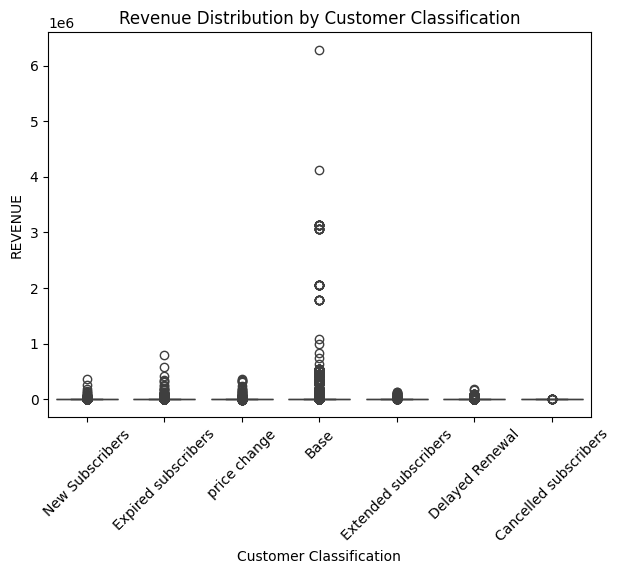

In [ ]:
# Plotting the relationship between Revenue and Customer Classification
plt.figure(figsize=(7, 5))
sns.boxplot(x='Customer Classification', y='REVENUE', data=data_cleaned)
plt.title('Revenue Distribution by Customer Classification')
plt.xticks(rotation=45)
plt.show()

High Revenue Concentration in "Base" Customers:

    The "Base" classification shows a significantly higher median revenue compared to other categories, indicating that this segment is critical for overall revenue generation.

Outliers Present:
    
    Several outliers are visible across all classifications, particularly among "Base" customers. These outliers may represent high-value transactions that can greatly impact revenue.

Low Revenue for New and Expired Subscribers:

    The "New Subscribers" and "Expired Subscribers" classifications display lower median revenues, suggesting that these segments may require targeted engagement strategies to enhance their spending.

Potential for Upselling:

    the low revenue levels in classifications like "Extended Subscribers" and "Cancelled Subscribers" indicate a possible opportunity for upselling or improving the value proposition to these customers.

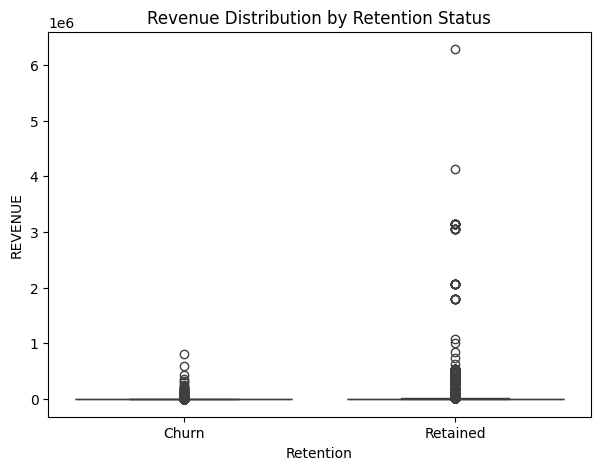

In [ ]:
#Feature Distribution by Target Variable
# create a binary target variable for retention based on revenue and customer classification
data_cleaned['Retention'] = np.where(
    (data_cleaned['REVENUE'] > data_cleaned['REVENUE'].median()) &
    (data_cleaned['Customer Classification'].isin(['New Subscribers', 'Base'])) |
    ((data_cleaned['Customer Classification'] == 'price change') & (data_cleaned['REVENUE'] > 0)), 1,  # Retained
    0  # Churned
)


# Box plot for Revenue based on Retention
plt.figure(figsize=(7, 5))
sns.boxplot(x='Retention', y='REVENUE', data=data_cleaned)
plt.title('Revenue Distribution by Retention Status')
plt.xticks([0, 1], ['Churn', 'Retained'])
plt.show()


The box plot illustrates a significant difference in revenue distribution between retained and churned customers.

    Retained customers display a higher median revenue, suggesting effective engagement and loyalty.
    Churned customers exhibit lower revenue, indicating a potential loss in valuable business.
Recommendations:
    
    Targeted retention Strategies: Implement personalized retention strategies for churned customers to address the reasons behind their disengagement.
    Customer feedback; Establish channels for feedback from churned customers to understand their pain points and improve retention efforts for active customers.


# model prep & feature selection

In [ ]:
#useing rf to see what feature is most important

#  encode categorical variables
data_encoded = pd.get_dummies(data_cleaned[['Customer Classification', 'CATEGORY',
                                             'Purchaser_Segment', 'Sub Category',
                                             'TYPE', 'PRODUCT_FAMILY', 'SHIPPING_COUNTRY']], drop_first=True)

# include the retention variable
data_encoded['Retention'] = data_cleaned['Retention']
data_encoded['REVENUE'] = data_cleaned['REVENUE']
data_encoded['UNIT_COUNT'] = data_cleaned['UNIT_COUNT']

data_encoded

Customer Classification_Cancelled subscribers  \
0                                              False   
1                                              False   
2                                              False   
3                                              False   
4                                              False   
...                                              ...   
18887                                          False   
18888                                          False   
18889                                          False   
18890                                          False   
18891                                          False   

       Customer Classification_Delayed Renewal  \
0                                        False   
1                                        False   
2                                        False   
3                                        False   
4                                        False   
...                                        ...   
18887                                    False   
18888                                    False   
18889                                    False   
18890                                    False   
18891                                     True   

       Customer Classification_Expired subscribers  \
0                                            False   
1                                             True   
2                                             True   
3                                            False   
4                                            False   
...                                            ...   
18887                                        False   
18888                                         True   
18889                                        False   
18890                                        False   
18891                                        False   

       Customer Classification_Extended subscribers  \
0                                             False   
1                                             False   
2                                             False   
3                                             False   
4                                             False   
...                                             ...   
18887                                         False   
18888                                         False   
18889                                         False   
18890                                         False   
18891                                         False   

       Customer Classification_New Subscribers  \
0                                         True   
1                                        False   
2                                        False   
3                                        False   
4                                         True   
...                                        ...   
18887                                    False   
18888                                    False   
18889                                     True   
18890                                     True   
18891                                    False   

       Customer Classification_price change  CATEGORY_New  CATEGORY_Renewal  \
0                                     False          True             False   
1                                     False          True             False   
2                                     False          True             False   
3                                      True         False             False   
4                                     False          True             False   
...                                     ...           ...               ...   
18887                                  True         False              True   
18888                                 False         False              True   
18889                                 False          True             False   
18890                           

In [ ]:
# Function to calculate VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [sm.OLS(X[col], sm.add_constant(X.drop(columns=[col]))).fit().rsquared for col in X.columns]
    vif_data["VIF"] = 1 / (1 - vif_data["VIF"])
    return vif_data



In [ ]:
#features (X) and target (y) for modeling
X = data_encoded.drop(columns=['Retention', 'REVENUE', 'UNIT_COUNT'])   # Exclude the target variable
y = data_encoded['Retention']

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#for vif calc, need to have 1/0 not bool
X_train = X_train.astype(int)
X_test = X_test.astype(int)

In [ ]:
print(X_train.dtypes)

Customer Classification_Cancelled subscribers    int64
Customer Classification_Delayed Renewal          int64
Customer Classification_Expired subscribers      int64
Customer Classification_Extended subscribers     int64
Customer Classification_New Subscribers          int64
                                                 ...  
SHIPPING_COUNTRY_VENEZUELA                       int64
SHIPPING_COUNTRY_VIETNAM                         int64
SHIPPING_COUNTRY_VIRGIN ISLANDS U S A            int64
SHIPPING_COUNTRY_ZAMBIA                          int64
SHIPPING_COUNTRY_ZIMBABWE                        int64
Length: 139, dtype: object


In [ ]:
#calculate VIF for the training set
vif_train = calculate_vif(X_train)
print("Variance Inflation Factor (VIF) for Training Set:\n", vif_train)

Variance Inflation Factor (VIF) for Training Set:
                                            feature       VIF
0    Customer Classification_Cancelled subscribers  1.088760
1          Customer Classification_Delayed Renewal  1.202995
2      Customer Classification_Expired subscribers  1.188064
3     Customer Classification_Extended subscribers  1.101716
4          Customer Classification_New Subscribers  1.650398
..                                             ...       ...
134                     SHIPPING_COUNTRY_VENEZUELA  1.884349
135                       SHIPPING_COUNTRY_VIETNAM  2.987456
136          SHIPPING_COUNTRY_VIRGIN ISLANDS U S A  3.755244
137                        SHIPPING_COUNTRY_ZAMBIA  1.722697
138                      SHIPPING_COUNTRY_ZIMBABWE  2.436597

[139 rows x 2 columns]


In [ ]:
# filter features with VIF <= 10
features_to_keep = vif_train[vif_train['VIF'] <= 10]['feature'].values
X_train_vif = X_train[features_to_keep]

In [ ]:
X_train_vif.columns


Index(['Customer Classification_Cancelled subscribers',
       'Customer Classification_Delayed Renewal',
       'Customer Classification_Expired subscribers',
       'Customer Classification_Extended subscribers',
       'Customer Classification_New Subscribers',
       'Customer Classification_price change', 'CATEGORY_New',
       'Purchaser_Segment_low enrollment', 'Purchaser_Segment_per_student',
       'Purchaser_Segment_private',
       ...
       'SHIPPING_COUNTRY_UKRAINE', 'SHIPPING_COUNTRY_UNITED ARAB EMIRATES',
       'SHIPPING_COUNTRY_UNITED KINGDOM', 'SHIPPING_COUNTRY_URUGUAY',
       'SHIPPING_COUNTRY_UZBEKISTAN', 'SHIPPING_COUNTRY_VENEZUELA',
       'SHIPPING_COUNTRY_VIETNAM', 'SHIPPING_COUNTRY_VIRGIN ISLANDS U S A',
       'SHIPPING_COUNTRY_ZAMBIA', 'SHIPPING_COUNTRY_ZIMBABWE'],
      dtype='object', length=130)

In [ ]:
# Select the top k features based on F-test
selector = SelectKBest(score_func=f_classif, k=30)
X_train_selected = selector.fit_transform(X_train_vif, y_train)

In [ ]:

selected_indices = selector.get_support(indices=True)
selected_features = X_train_vif.columns[selected_indices]
print("Selected Features based on F-Test:\n", selected_features)

Selected Features based on F-Test:
 Index(['Customer Classification_Cancelled subscribers',
       'Customer Classification_Delayed Renewal',
       'Customer Classification_Expired subscribers',
       'Customer Classification_Extended subscribers',
       'Customer Classification_price change', 'CATEGORY_New',
       'Purchaser_Segment_low enrollment', 'Purchaser_Segment_school',
       'Sub Category_Expansion', 'Sub Category_New customer',
       'Sub Category_Up-sell', 'PRODUCT_FAMILY_Essentials',
       'SHIPPING_COUNTRY_BOSNIA AND HERZEGOVINA', 'SHIPPING_COUNTRY_ECUADOR',
       'SHIPPING_COUNTRY_GUAM', 'SHIPPING_COUNTRY_HONDURAS',
       'SHIPPING_COUNTRY_ISRAEL', 'SHIPPING_COUNTRY_NIGERIA',
       'SHIPPING_COUNTRY_NORTHERN MARIANA ISLANDS',
       'SHIPPING_COUNTRY_PUERTO RICO', 'SHIPPING_COUNTRY_SAUDI ARABIA',
       'SHIPPING_COUNTRY_SWEDEN', 'SHIPPING_COUNTRY_SWITZERLAND',
       'SHIPPING_COUNTRY_TAIWAN', 'SHIPPING_COUNTRY_TANZANIA',
       'SHIPPING_COUNTRY_TURKEY', 'SHIP

# model building

In [ ]:
# rf as classifier for rfe
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
#train rfe
rfe = RFE(estimator=rf_model, n_features_to_select=15)
X_train_rfe = rfe.fit_transform(X_train_selected, y_train)

In [ ]:
# Get the selected features from RFE
rfe_selected_indices = rfe.get_support(indices=True)
rfe_selected_features = selected_features[rfe_selected_indices]
print("Selected Features after RFE:\n", rfe_selected_features)

Selected Features after RFE:
 Index(['Customer Classification_Cancelled subscribers',
       'Customer Classification_Delayed Renewal',
       'Customer Classification_Expired subscribers',
       'Customer Classification_Extended subscribers',
       'Customer Classification_price change', 'CATEGORY_New',
       'Purchaser_Segment_low enrollment', 'Purchaser_Segment_school',
       'Sub Category_Up-sell', 'PRODUCT_FAMILY_Essentials',
       'SHIPPING_COUNTRY_BOSNIA AND HERZEGOVINA', 'SHIPPING_COUNTRY_ECUADOR',
       'SHIPPING_COUNTRY_GUAM', 'SHIPPING_COUNTRY_NORTHERN MARIANA ISLANDS',
       'SHIPPING_COUNTRY_PUERTO RICO'],
      dtype='object')


In [ ]:

X_train_final = X_train[selected_features[rfe.get_support()]]  # final feature set from f test and rfe
X_test_final = X_test[selected_features[rfe.get_support()]]


In [ ]:
#using rf
rf_model.fit(X_train_final, y_train)

RandomForestClassifier(random_state=42)

# features rank

In [ ]:
#Get feature importances
importances = rf_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X_train_final.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

In [ ]:
feature_importance

Feature  Importance
2     Customer Classification_Expired subscribers    0.316646
1         Customer Classification_Delayed Renewal    0.221348
4            Customer Classification_price change    0.176460
3    Customer Classification_Extended subscribers    0.098036
9                       PRODUCT_FAMILY_Essentials    0.069758
0   Customer Classification_Cancelled subscribers    0.027638
5                                    CATEGORY_New    0.021847
6                Purchaser_Segment_low enrollment    0.012787
7                        Purchaser_Segment_school    0.010659
12                          SHIPPING_COUNTRY_GUAM    0.008618
13      SHIPPING_COUNTRY_NORTHERN MARIANA ISLANDS    0.008609
11                       SHIPPING_COUNTRY_ECUADOR    0.007141
14                   SHIPPING_COUNTRY_PUERTO RICO    0.007091
8                            Sub Category_Up-sell    0.006968
10        SHIPPING_COUNTRY_BOSNIA AND HERZEGOVINA    0.006393

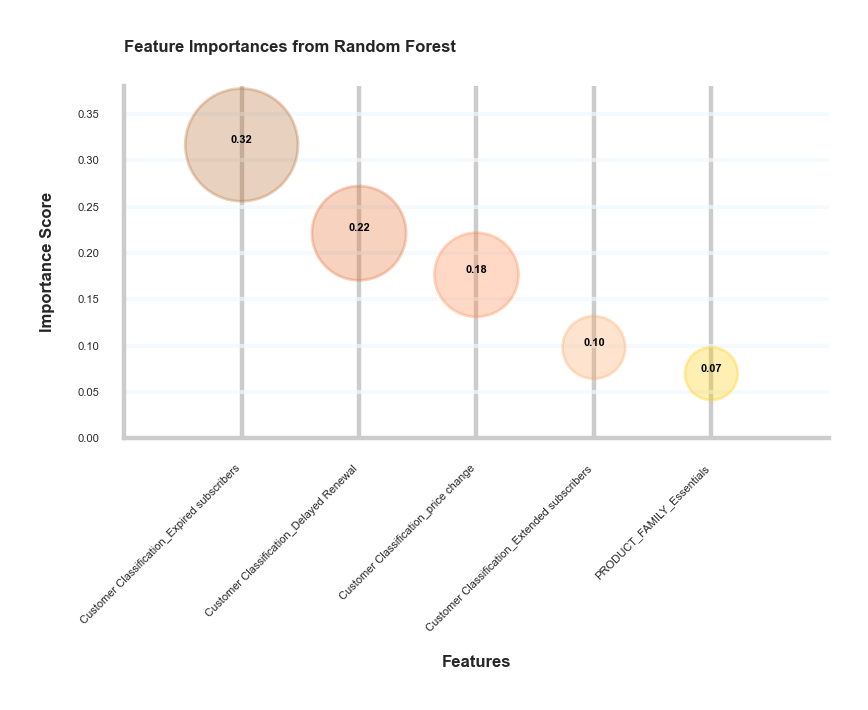

In [ ]:
top_features = feature_importance.head(5)


plt.rcParams['figure.dpi'] = 400
fig = plt.figure(figsize=(5, 4), facecolor='#FFFFFF')
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.2, hspace=1.5)
background_color = "#FFFFFF"


color_map = ["#90AACB" for _ in range(top_features.shape[0])]
color_map[0] = "#B56828"
color_map[1] = "#E26A2C"
color_map[2] = "#FF8243"
color_map[3] = "#FDA65D"
color_map[4] = "#FFCC00"
sns.set_palette(sns.color_palette(color_map))

# create the subplot
ax0 = fig.add_subplot(gs[0, 0])
ax0.set(xlim=(-1, 5))
ax0.set(ylim=(0, top_features['Importance'].max() * 1.2))
ax0.set_facecolor(background_color)


for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

# bubble
bubble_size = top_features['Importance'] * 1300  # Scale bubble sizes for visibility


ax0.scatter(x=top_features['Feature'],
            y=top_features['Importance'],
            s=bubble_size,
            color=color_map,
            zorder=2,
            alpha=0.3,
            lw=0.5)

# grid
ax0.grid(which='major', axis='y', zorder=0, color='#F0F8FF', linewidth=0.7, alpha=0.7)


for i in range(top_features.shape[0]):
    ax0.annotate(f"{top_features['Importance'].iloc[i]:.2f}",
                 (top_features['Feature'].iloc[i], top_features['Importance'].iloc[i]),
                 ha='center', va='bottom', fontsize=2, weight='semibold', color="#000000")


ax0.set_xlabel("Features", fontsize=3, weight='semibold')
ax0.set_ylabel("Importance Score", fontsize=3, weight='semibold')
ax0.tick_params(labelsize=2, width=0.3, length=1)
plt.setp(ax0.xaxis.get_majorticklabels(), rotation=45, ha="right")


x0, x1 = ax0.get_xlim()
y0, y1 = ax0.get_ylim()
ax0.text(x0, y1 + 0.05, 'Feature Importances from Random Forest', fontsize=3, ha='left', va='top', weight='bold')

plt.tight_layout()
plt.show()

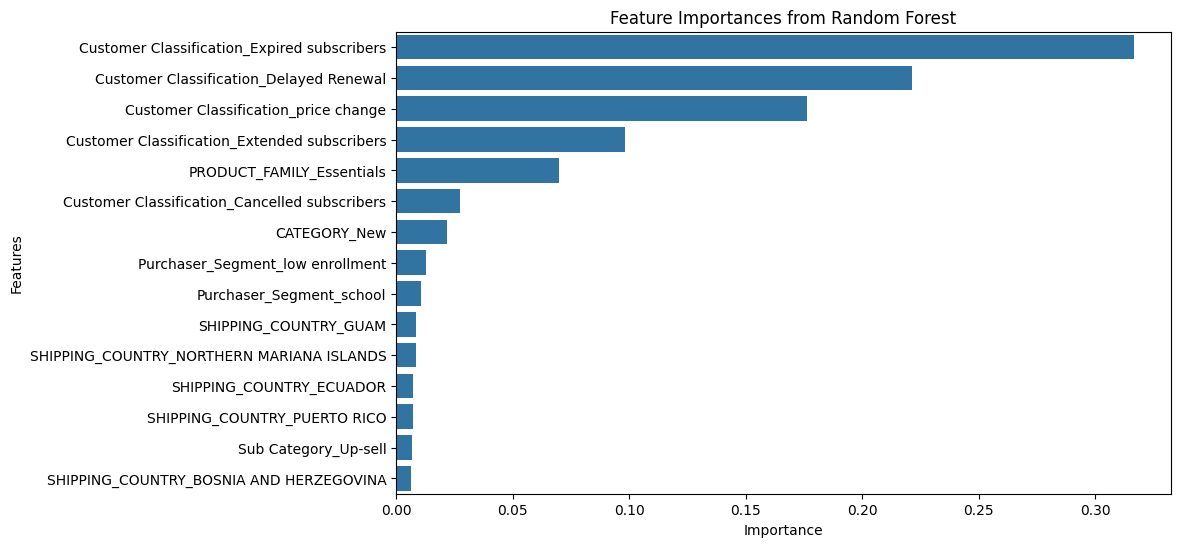

In [ ]:
#feature plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# model evaluation

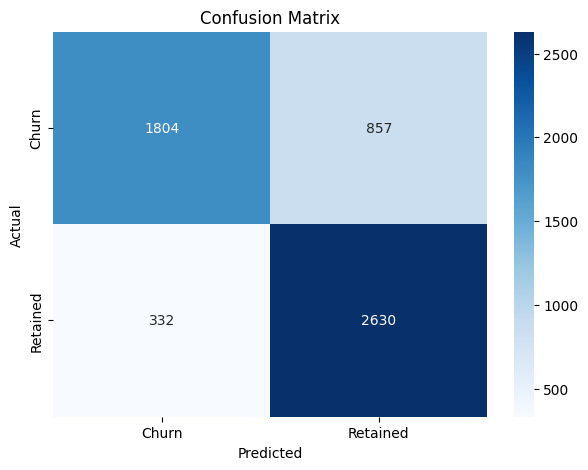

In [ ]:
# confusion Matrix
y_pred = rf_model.predict(X_test_final)
conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Churn', 'Retained'], yticklabels=['Churn', 'Retained'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
#Evaluate model performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.68      0.75      2661
           1       0.75      0.89      0.82      2962

    accuracy                           0.79      5623
   macro avg       0.80      0.78      0.78      5623
weighted avg       0.80      0.79      0.79      5623



In [ ]:
#let use grid search to see if the model can be improved
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='f1')
grid_search.fit(X_train_final, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 500]},
             scoring='f1', verbose=2)

In [ ]:
#seeing what the best parameters are
print("Best parameters from Grid Search:\n", grid_search.best_params_)

Best parameters from Grid Search:
 {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
#evaluate the best model
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test_final)

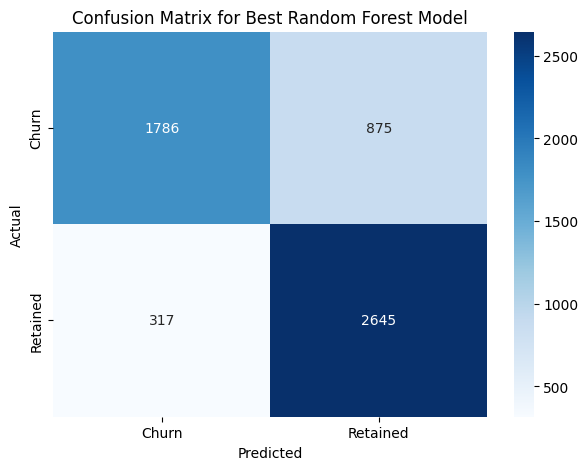

In [ ]:
#new confusion matrix
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', xticklabels=['Churn', 'Retained'], yticklabels=['Churn', 'Retained'])
plt.title('Confusion Matrix for Best Random Forest Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

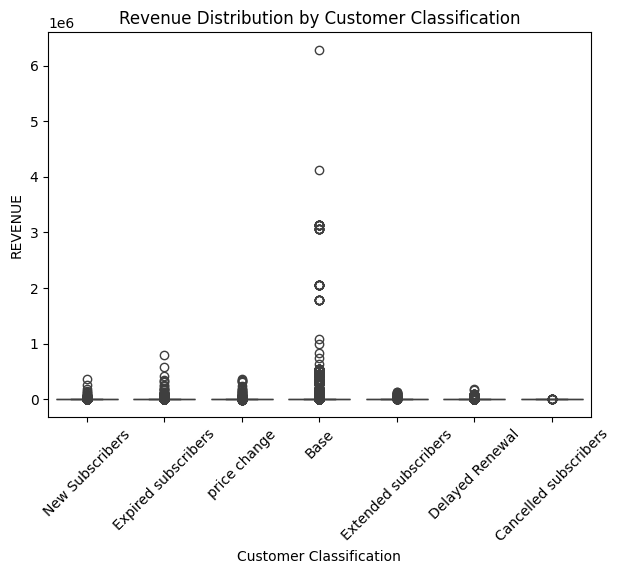

In [ ]:
# revenue Analysis by selected feature
plt.figure(figsize=(7, 5))
sns.boxplot(x='Customer Classification', y='REVENUE', data=data_cleaned)
plt.title('Revenue Distribution by Customer Classification')
plt.xticks(rotation=45)
plt.show()

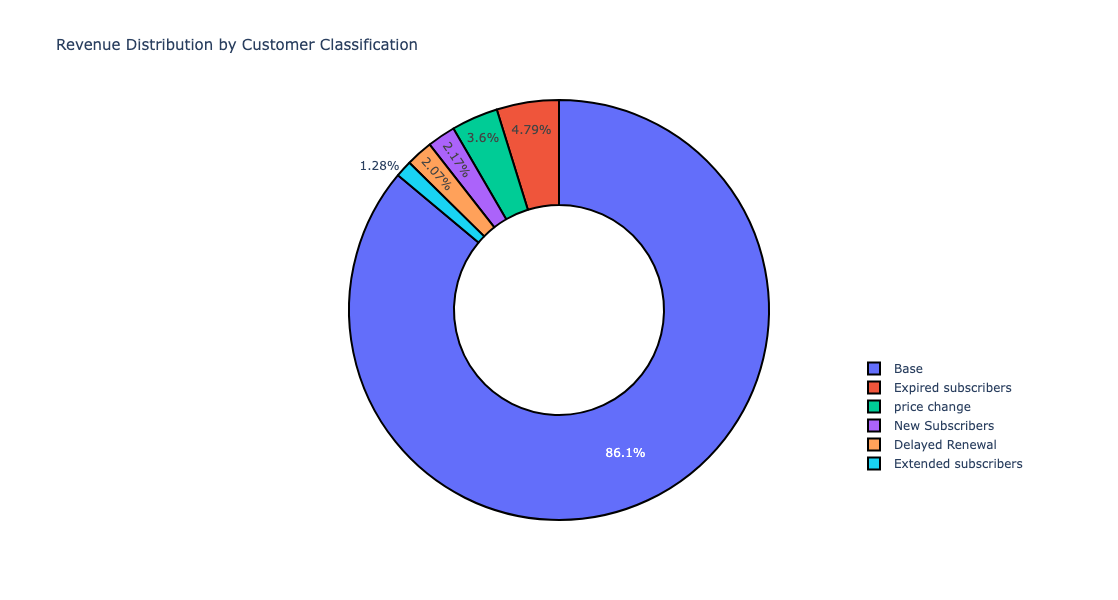

In [ ]:
#revenue by customer classification
revenue_by_classification = data_cleaned.groupby('Customer Classification')['REVENUE'].sum().reset_index()

# filter out small classifications
total_revenue = revenue_by_classification['REVENUE'].sum()
threshold = total_revenue * 0.01  # Set threshold for 1%
filtered_revenue = revenue_by_classification[revenue_by_classification['REVENUE'] >= threshold]

# sort
sorted_values = filtered_revenue.sort_values(by='REVENUE', ascending=False)


donut_chart = go.Pie(
    labels=sorted_values['Customer Classification'],
    values=sorted_values['REVENUE'],
    hole=0.5,  # This creates a donut chart
    textinfo='percent',  # Display only percentage on slices
    showlegend=True,  # Enable legend
    marker=dict(line=dict(color='#000000', width=2))  # Optional: Add a border to the slices
)

layout = dict(
    title=dict(text='Revenue Distribution by Customer Classification', font=dict(size=15)),  # Increase title font size
    font=dict(size=12),  # Increase general font size
    legend=dict(
        orientation="v",  # Horizontal orientation for the legend
        yanchor="bottom",
        y=0.1,  # Move legend higher to avoid overlap
        xanchor="center",
        x=1
    ),
    width=800,  # Set width of the chart
    height=600  # Set height of the chart
)


fig = dict(data=[donut_chart], layout=layout)


py.iplot(fig)


## Insights
Top Contributors: Identify which customer classifications generate the most revenue. For instance, if the "Base" classification contributes significantly, it indicates a solid customer base.
Opportunities for Growth: Highlight classifications with lower revenue contributions. These may represent untapped segments that could benefit from targeted marketing or product offerings.
Retention Importance: If certain classifications show high revenue but also high churn, it may indicate the need for enhanced retention strategies.

## Key Insight:
The 'Base' customer classification accounts for the highest revenue, contributing 86% of total revenue.

## Growth Opportunity: Recommendations:
Enhance Marketing Campaigns: Develop targeted marketing campaigns aimed at 'New Subscribers' to convert them into long-term customers.
Re-engagement Strategies: Create specific strategies to win back 'Cancelled Subscribers' by offering incentives or tailored promotions.
Retention Focus: It's crucial to develop retention strategies for classifications that contribute high revenue but have shown signs of churn.

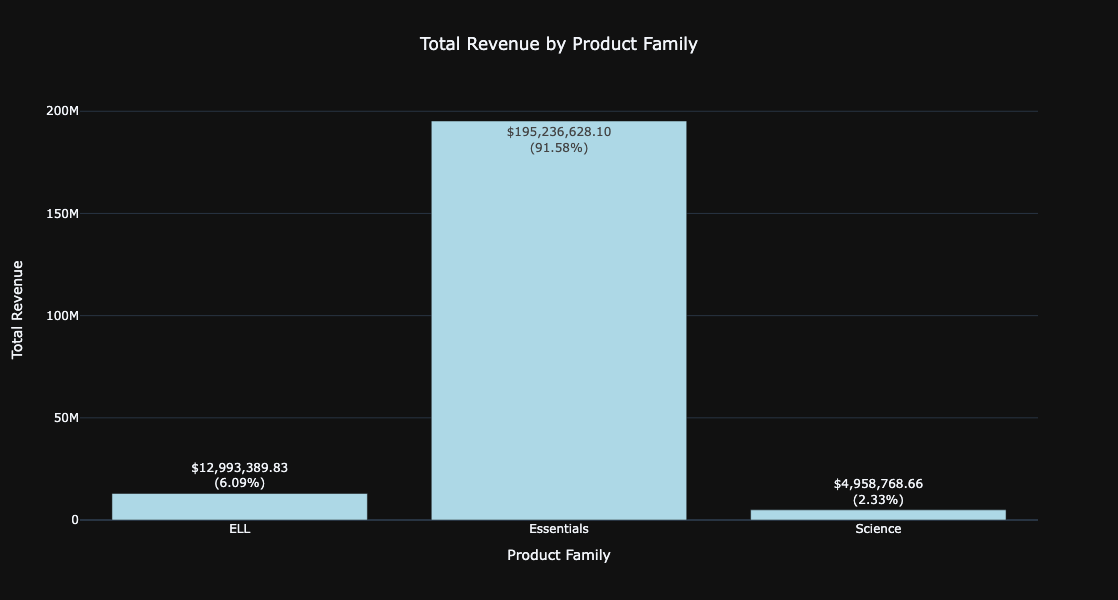

In [ ]:
# revenue by product family
revenue_by_product = data_cleaned.groupby('PRODUCT_FAMILY')['REVENUE'].sum().reset_index()

# total revenue and percentage for each product family
total_revenue = revenue_by_product['REVENUE'].sum()
revenue_by_product['Percentage'] = (revenue_by_product['REVENUE'] / total_revenue) * 100

# text for each bar showing both revenue and percentage
revenue_by_product['DisplayText'] = revenue_by_product.apply(
    lambda x: f"${x['REVENUE']:,.2f}<br>({x['Percentage']:.2f}%)", axis=1
)

fig = go.Figure()

fig.add_trace(go.Bar(
    x=revenue_by_product['PRODUCT_FAMILY'],
    y=revenue_by_product['REVENUE'],
    marker=dict(color='lightblue'),
    text=revenue_by_product['DisplayText'],
    textposition='auto'
))


fig.update_layout(
    title='Total Revenue by Product Family',
    title_x=0.5,
    xaxis_title='Product Family',
    yaxis_title='Total Revenue',
    template='plotly_dark',
    font=dict(size=12),
    plot_bgcolor='rgba(0,0,0,0)',
    height=600
)


py.iplot(fig)

## Insights:
Top Revenue Contributors: Identify which product families generate the most revenue.
Focus Areas: Highlight product families with lower revenue, suggesting potential areas for marketing or product development.

## Key Insight:
The 'Essentials' product family is the largest revenue contributor, accounting for almost 92% of total revenue.

## Recommendation:
Consider investing in marketing strategies for underperforming product families such as 'Science' and 'ELL.'


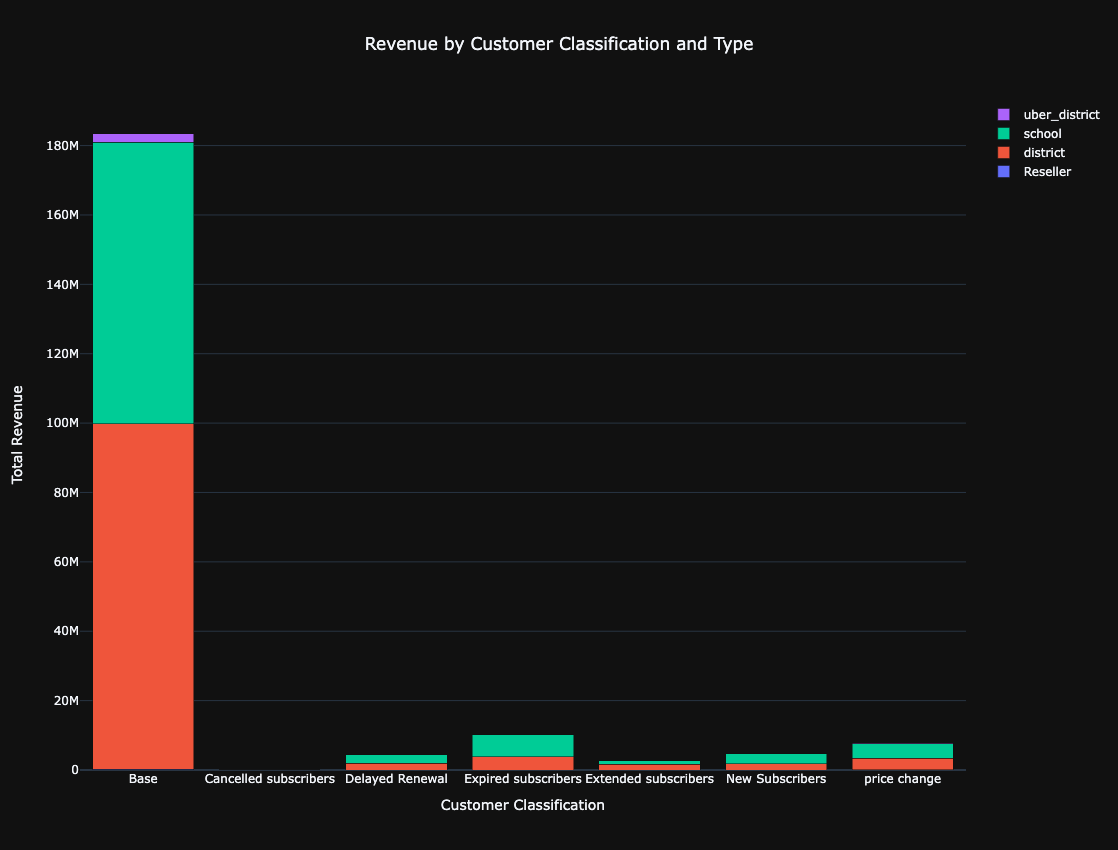

In [ ]:

revenue_by_type_and_class = data_cleaned.groupby(['Customer Classification', 'TYPE'])['REVENUE'].sum().unstack()


fig = go.Figure()

for customer_type in revenue_by_type_and_class.columns:
    fig.add_trace(go.Bar(
        x=revenue_by_type_and_class.index,
        y=revenue_by_type_and_class[customer_type],
        name=customer_type,
        hoverinfo='y+name',
    ))

fig.update_layout(
    title='Revenue by Customer Classification and Type',
    title_x=0.5,
    barmode='stack',
    xaxis_title='Customer Classification',
    yaxis_title='Total Revenue',
    template='plotly_dark',
    font=dict(size=12),
    plot_bgcolor='rgba(0,0,0,0)',
    width=800,
    height=850
)
fig.show()

## insights:
Top Contributors: Identify which customer classifications generate the most revenue. For instance, if the "Base" classification contributes significantly, it indicates a solid customer base.
Opportunities for Growth: Highlight classifications with lower revenue contributions. These may represent untapped segments that could benefit from targeted marketing or product offerings.
Retention Importance: If certain classifications show high revenue but also high churn, it may indicate the need for enhanced retention strategies.

## Key Insight:
The 'Base' customer classification contributes significantly across all types, while 'Resellers' show strong potential for upselling.
## Recommendation:
Develop targeted campaigns for high-potential classifications to enhance overall revenue.

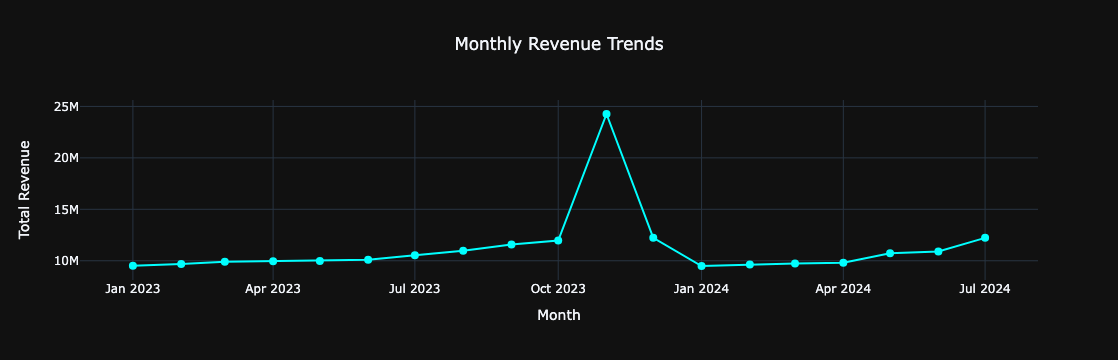

In [ ]:
#new column for Month
data_cleaned['Month'] = data_cleaned['Date'].dt.to_period('M')

#monthly revenue
monthly_revenue = data_cleaned.groupby('Month')['REVENUE'].sum().reset_index()


monthly_revenue['Month'] = monthly_revenue['Month'].astype(str)


fig = go.Figure()

fig.add_trace(go.Scatter(
    x=monthly_revenue['Month'],
    y=monthly_revenue['REVENUE'],
    mode='lines+markers',
    marker=dict(color='cyan', size=8),
    name='Monthly Revenue'
))

fig.update_layout(
    title='Monthly Revenue Trends',
    title_x=0.5,
    xaxis_title='Month',
    yaxis_title='Total Revenue',
    template='plotly_dark',
    font=dict(size=12),
    plot_bgcolor='rgba(0,0,0,0)'
)

fig.show()

## Insights:
The line graph shows fluctuations in monthly revenue, indicating seasonal trends and the effectiveness of marketing campaigns.
Notable spikes correlate with product launches or seasonal promotions.
## Recommendations:
Optimize Campaign Timing: Leverage historical revenue data to schedule marketing initiatives around peak revenue months for maximum impact.
Continuous Monitoring: Regularly monitor monthly trends to adapt strategies based on changing customer behaviors and market conditions.

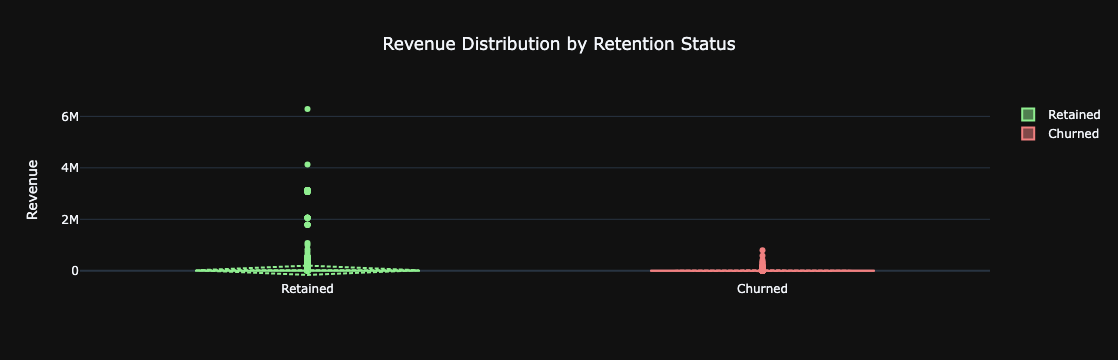

In [ ]:

fig = go.Figure()

fig.add_trace(go.Box(
    y=data_cleaned[data_cleaned['Retention'] == 1]['REVENUE'],
    name='Retained',
    marker_color='lightgreen',
    boxmean='sd'  # Show mean and standard deviation
))

fig.add_trace(go.Box(
    y=data_cleaned[data_cleaned['Retention'] == 0]['REVENUE'],
    name='Churned',
    marker_color='lightcoral',
    boxmean='sd'
))

fig.update_layout(
    title='Revenue Distribution by Retention Status',
    title_x=0.5,
    yaxis_title='Revenue',
    template='plotly_dark',
    font=dict(size=12),
    plot_bgcolor='rgba(0,0,0,0)'
)

fig.show()

## insights:
High-Value Customers: A few retained customers are high outliers, contributing substantially more revenue.
Churned Segment: Churned customers contribute minimal revenue, highlighting the need for churn reduction strategies.

## Recommendations:
Targeted Retention: Develop personalized campaigns for churned customers to recover potential lost revenue.
Focus on High-Value Customers: Identify characteristics of high-revenue retained customers to inform future acquisition and retention efforts.
Churn Analysis: Investigate churn drivers to improve customer retention strategies.

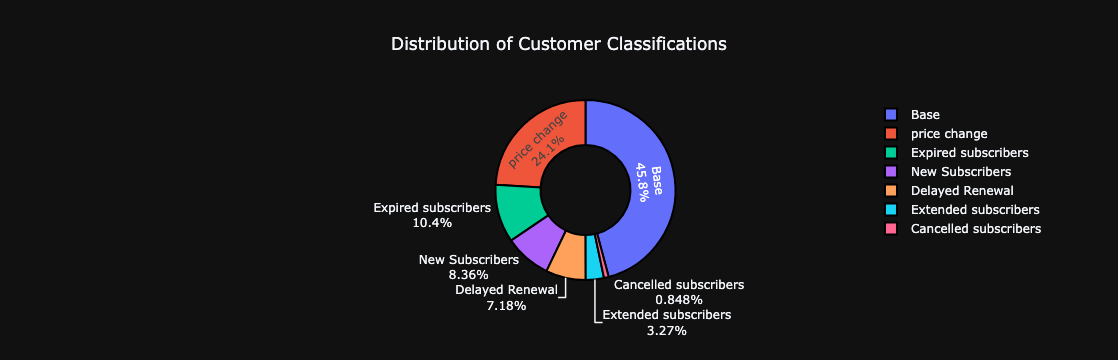

max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   4.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   8.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   4.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   2.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   5.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   2.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4,

In [ ]:
#count customer classifications
classification_counts = data_cleaned['Customer Classification'].value_counts().reset_index()
classification_counts.columns = ['Customer Classification', 'Count']


fig = go.Figure(data=go.Pie(
    labels=classification_counts['Customer Classification'],
    values=classification_counts['Count'],
    hole=0.5,
    textinfo='percent+label',
    marker=dict(line=dict(color='#000000', width=2))
))

fig.update_layout(
    title='Distribution of Customer Classifications',
    title_x=0.5,
    template='plotly_dark'
)


py.iplot(fig)

## Insights:
Dominant Segment: The "Base" category accounts for 45.8% of customers, indicating a strong foundation for retention strategies.
Churn Risks: Price Change customers represent 24.1%, requiring proactive engagement to address dissatisfaction.
Expired Subscribers at 10.4% highlight a need for win-back strategies.
Growth Opportunities:
New Subscribers (8.36%) and Delayed Renewals (7.18%) present targets for marketing efforts to enhance long-term loyalty.

## Recommendations
Engagement: Target "Price Change" and "Expired Subscribers" with communication to reduce churn.
Retention Programs: Enhance loyalty initiatives for "Base" customers to maintain engagement.
Feedback Channels: Gather insights from "New Subscribers" to refine services.
Reactivation Campaigns: Develop strategies to re-engage "Cancelled Subscribers" with promotions.



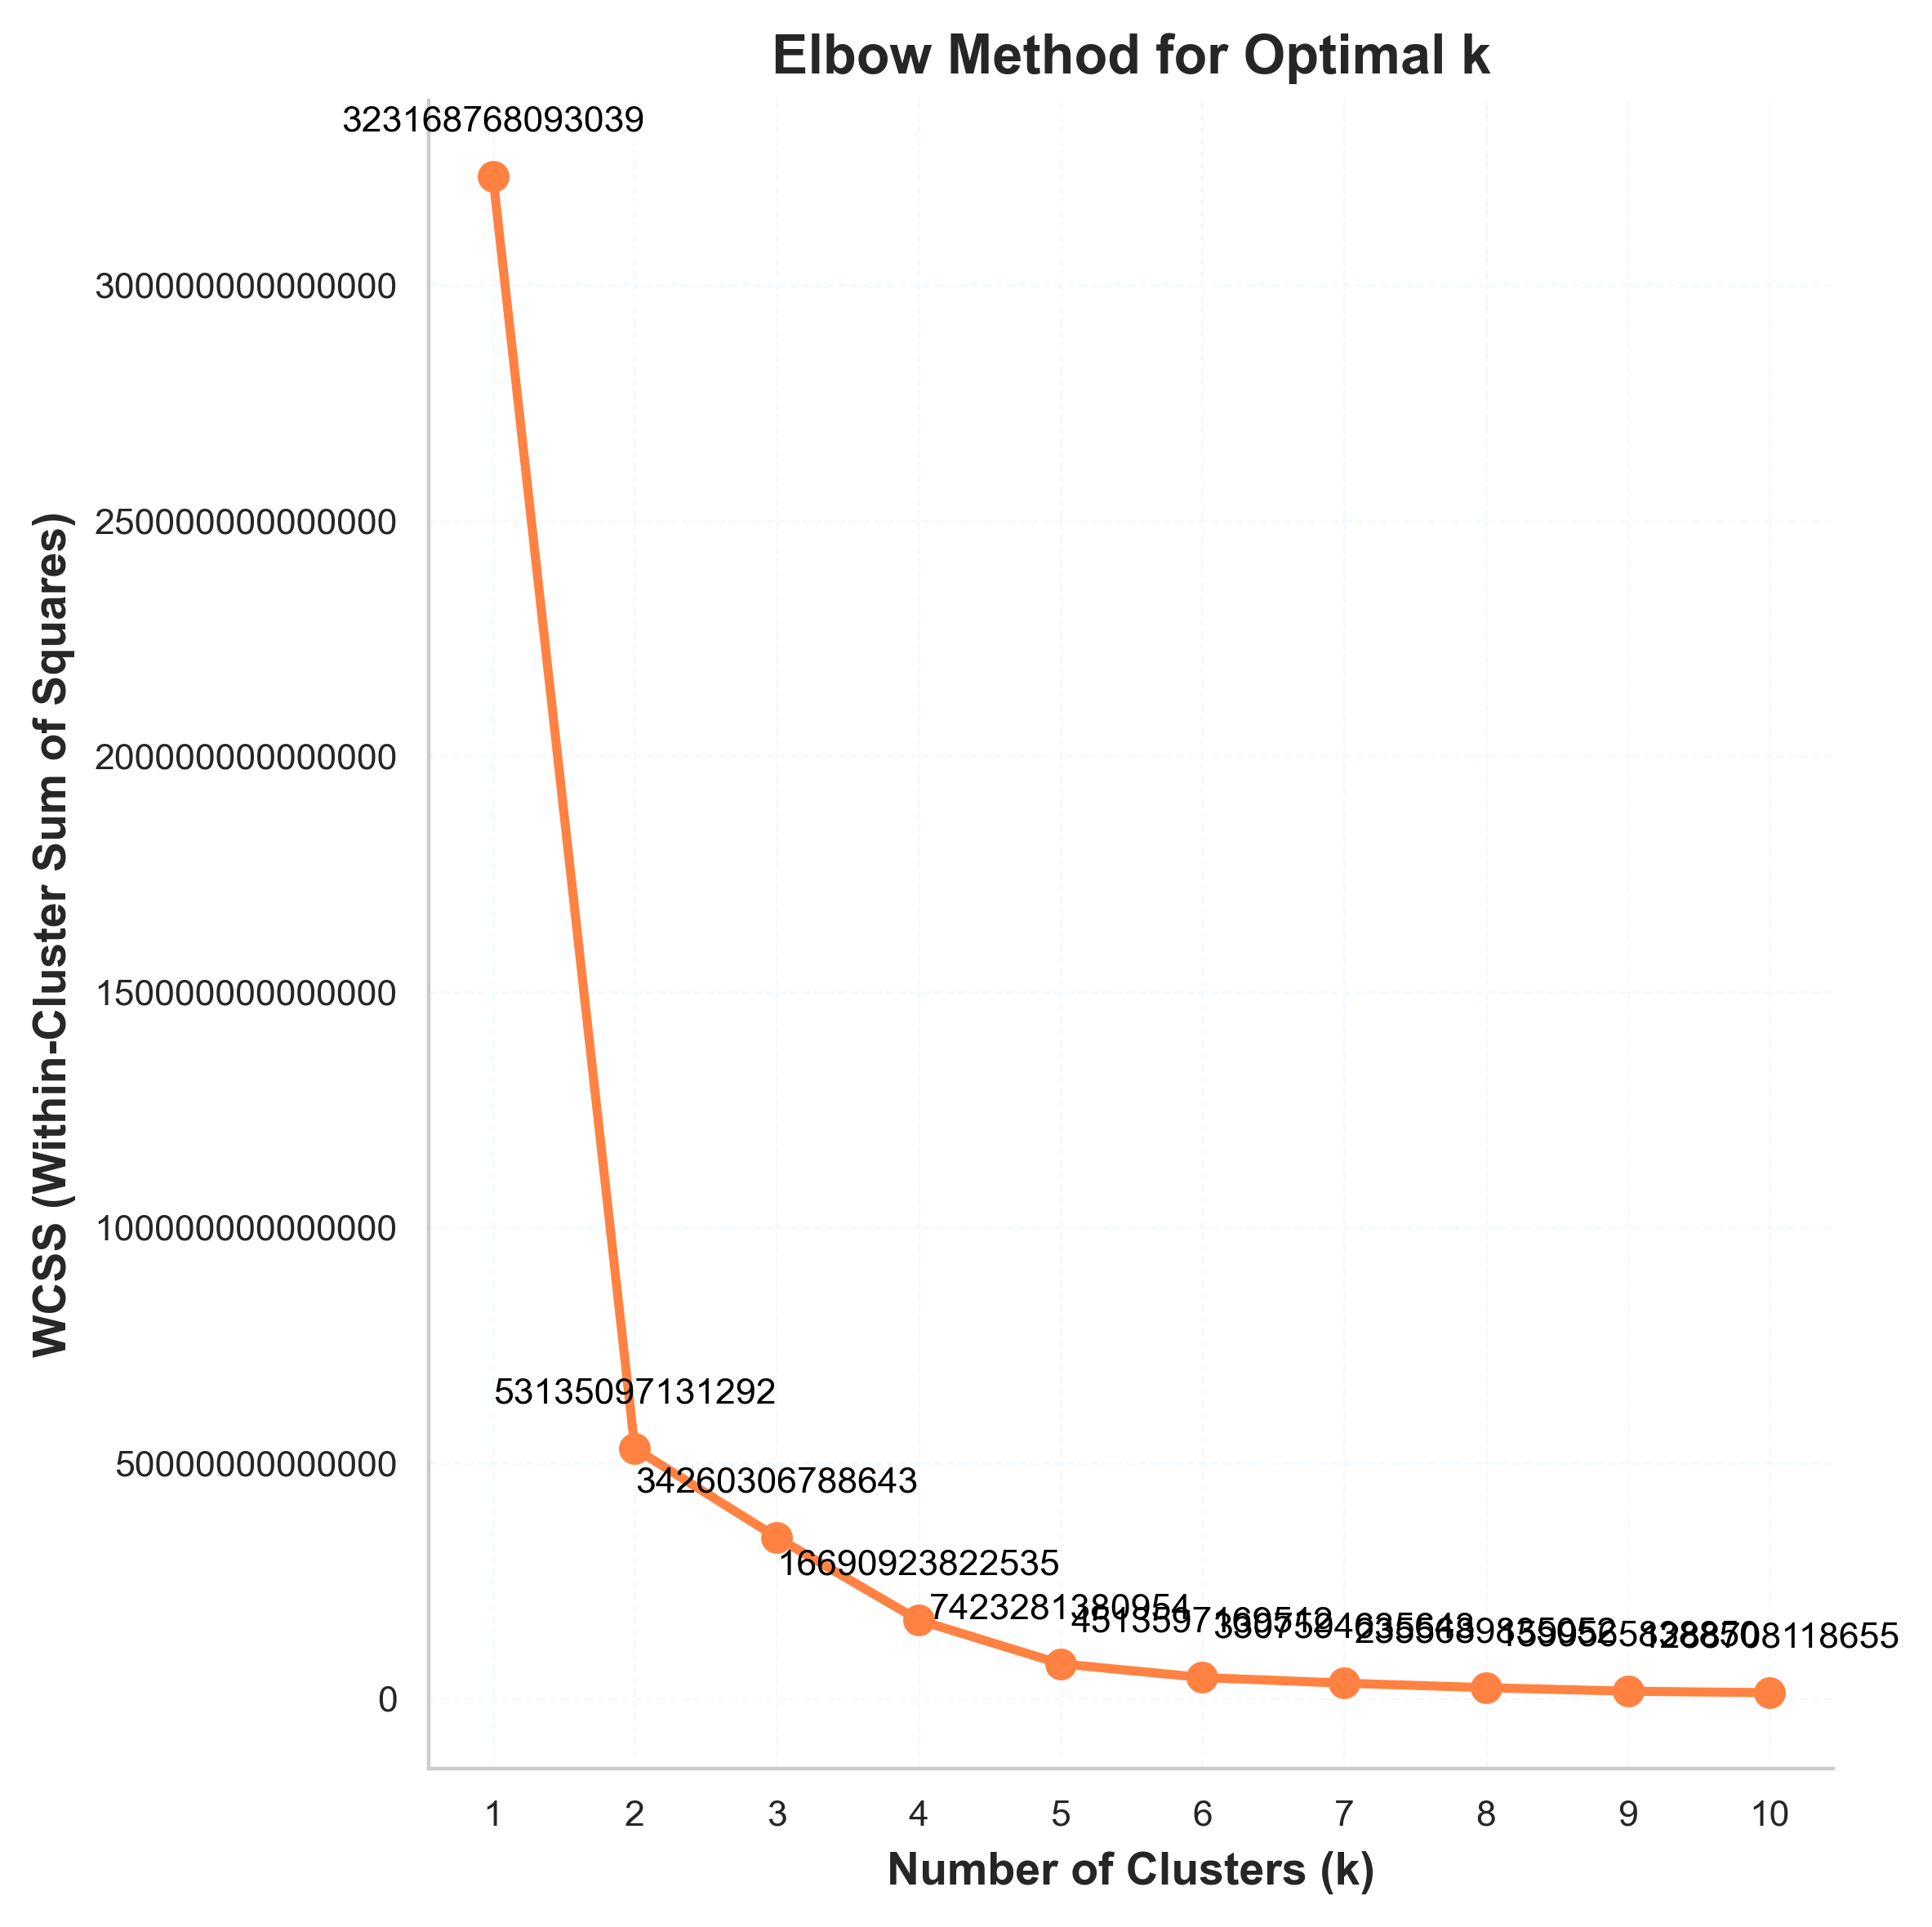

In [ ]:
#elbow
k_values = range(1, 11)
wcss = []

# WCSS for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_encoded[['REVENUE', 'UNIT_COUNT']])
    wcss.append(kmeans.inertia_)


plt.rcParams['figure.dpi'] = 400
fig = plt.figure(figsize=(6, 6), facecolor='#FFFFFF')
background_color = "#FFFFFF"
sns.set_style("whitegrid")


color_map = "#FF8243"


ax_elbow = fig.add_subplot(1, 1, 1)
ax_elbow.set_facecolor(background_color)


ax_elbow.plot(k_values, wcss, marker='o', linestyle='-', color=color_map, linewidth=2, markersize=6)


ax_elbow.grid(True, which='major', axis='both', color='#F0F8FF', linestyle='--', linewidth=0.5, alpha=0.7)


for i in range(len(k_values)):
    ax_elbow.annotate(f"{wcss[i]:.0f}", (k_values[i], wcss[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color="#000000")

# Format axes
ax_elbow.set_xlabel("Number of Clusters (k)", fontsize=10, weight='semibold')
ax_elbow.set_ylabel("WCSS (Within-Cluster Sum of Squares)", fontsize=10, weight='semibold')
ax_elbow.set_title("Elbow Method for Optimal k", fontsize=12, weight='bold')
ax_elbow.set_xticks(k_values)
ax_elbow.set_xticklabels(k_values, fontsize=8, rotation=0)
ax_elbow.set_yticklabels([f"{int(y)}" for y in ax_elbow.get_yticks()], fontsize=8)

# Remove top and right spines for a cleaner look
for spine in ["right", "top"]:
    ax_elbow.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()

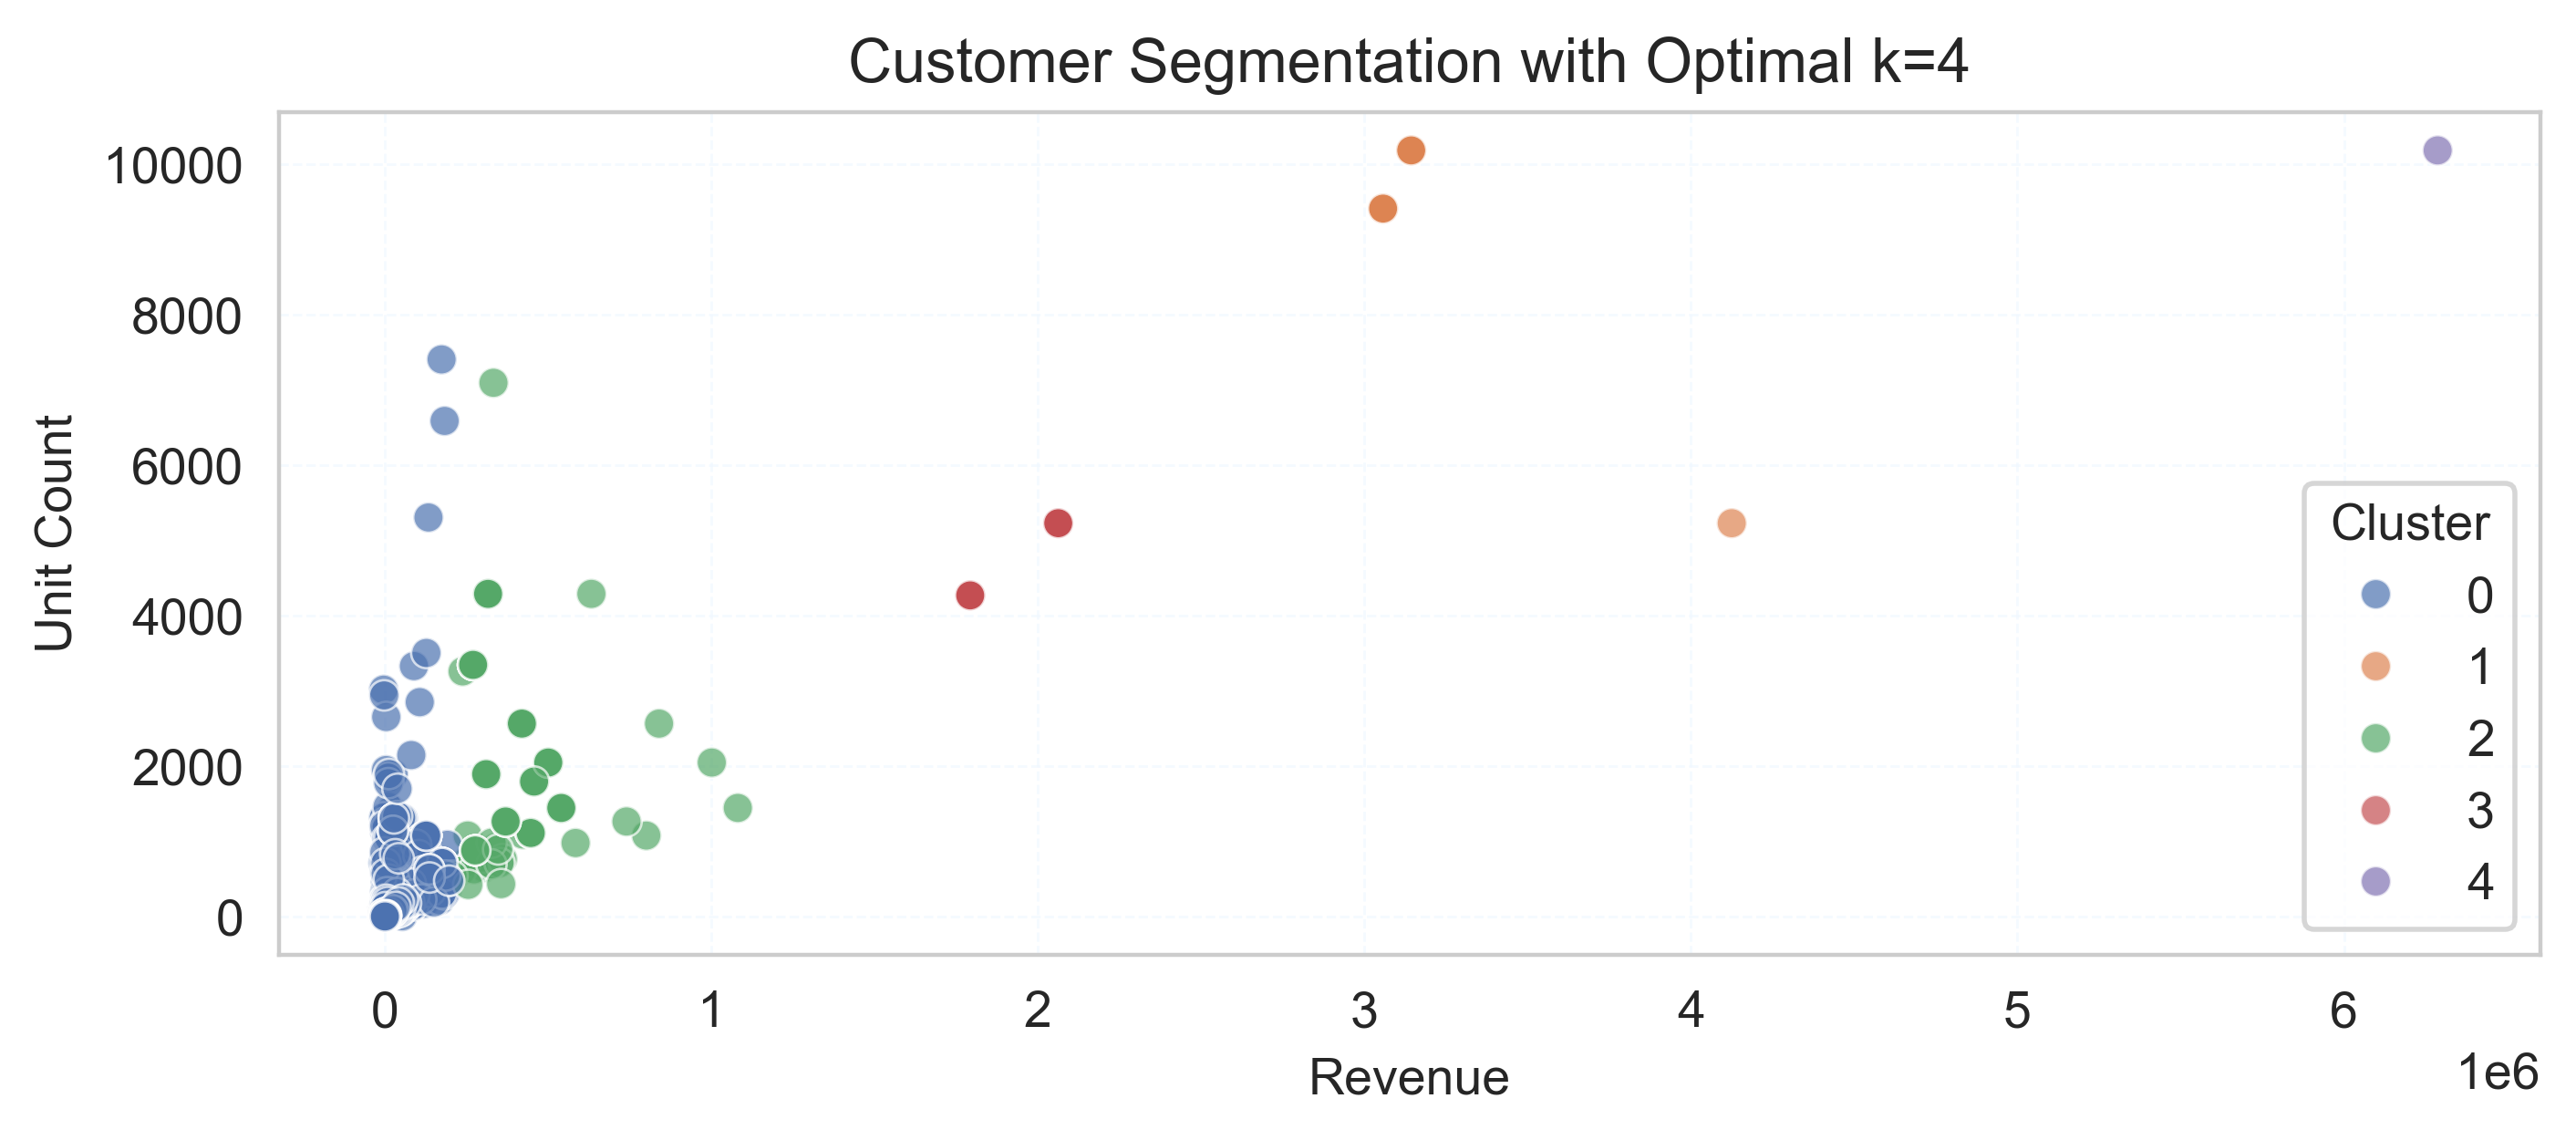

In [ ]:
#optimal from elbow
optimal_k = 5
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
data_cleaned['Cluster'] = kmeans_optimal.fit_predict(data_encoded[['REVENUE', 'UNIT_COUNT']])


plt.figure(figsize=(8, 3))
sns.scatterplot(x='REVENUE', y='UNIT_COUNT', hue='Cluster', data=data_cleaned, palette='deep', alpha=0.7)
plt.title("Customer Segmentation with Optimal k=4")
plt.xlabel("Revenue")
plt.ylabel("Unit Count")
plt.legend(title='Cluster')
plt.grid(True, which='major', axis='both', color='#F0F8FF', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

## cluster analysis
Cluster 0 (Blue): Predominantly low revenue and low unit count customers. This group may represent a significant portion of your customer base, indicating potential for growth.
Cluster 1 (Orange): Represents customers with moderate revenue and unit counts. These customers may be engaged but have room for increased spending or frequency.
Cluster 2 (Green): This cluster likely contains customers with higher unit counts, suggesting frequent engagement but lower revenue. This may indicate opportunities for upselling or cross-selling.
Cluster 3 (Red): Customers in this group show high revenue but lower unit counts. These could be high-value customers who purchase infrequently but spend significantly.
Cluster 4 (Purple): Very few customers fall into this cluster, characterized by extremely high revenue with low unit count. These customers could be rare, high-stakes accounts worth extra focus.

## Recommendations:

#### Targeted Marketing Strategies:

Cluster 0: Develop engagement strategies to increase interaction and revenue, such as special promotions, educational content, or incentives for higher purchases.
Cluster 1: Implement loyalty programs or targeted marketing campaigns aimed at converting these customers into higher spending segments.
Cluster 2: Focus on upselling opportunities. Since these customers frequently engage, ensure they are aware of additional products or services that may benefit them.
Cluster 3: Implement strategies to increase the frequency of purchases. Consider personalized communication to encourage regular buying behavior.
Cluster 4: Maintain strong relationships with these high-value customers. Regular check-ins and personalized service can enhance loyalty and retention.

## Resource Allocation:

Allocate more resources and efforts toward nurturing customers in Clusters 1, 2, and 3, as they show potential for increased spending.
For Cluster 0, implement strategies aimed at increasing overall engagement and usage of products or services.
Monitor Customer Behavior:

Continuously track the performance of each segment and adjust marketing strategies based on customer feedback and changes in purchasing behavior.
Utilize customer feedback to refine your understanding of their needs, ensuring your strategies align with their expectations.
Iterate and Adapt:

Regularly revisit the clustering analysis as customer behavior and market conditions change. Adapting your segmentation and marketing strategies will help maintain relevance and effectiveness.

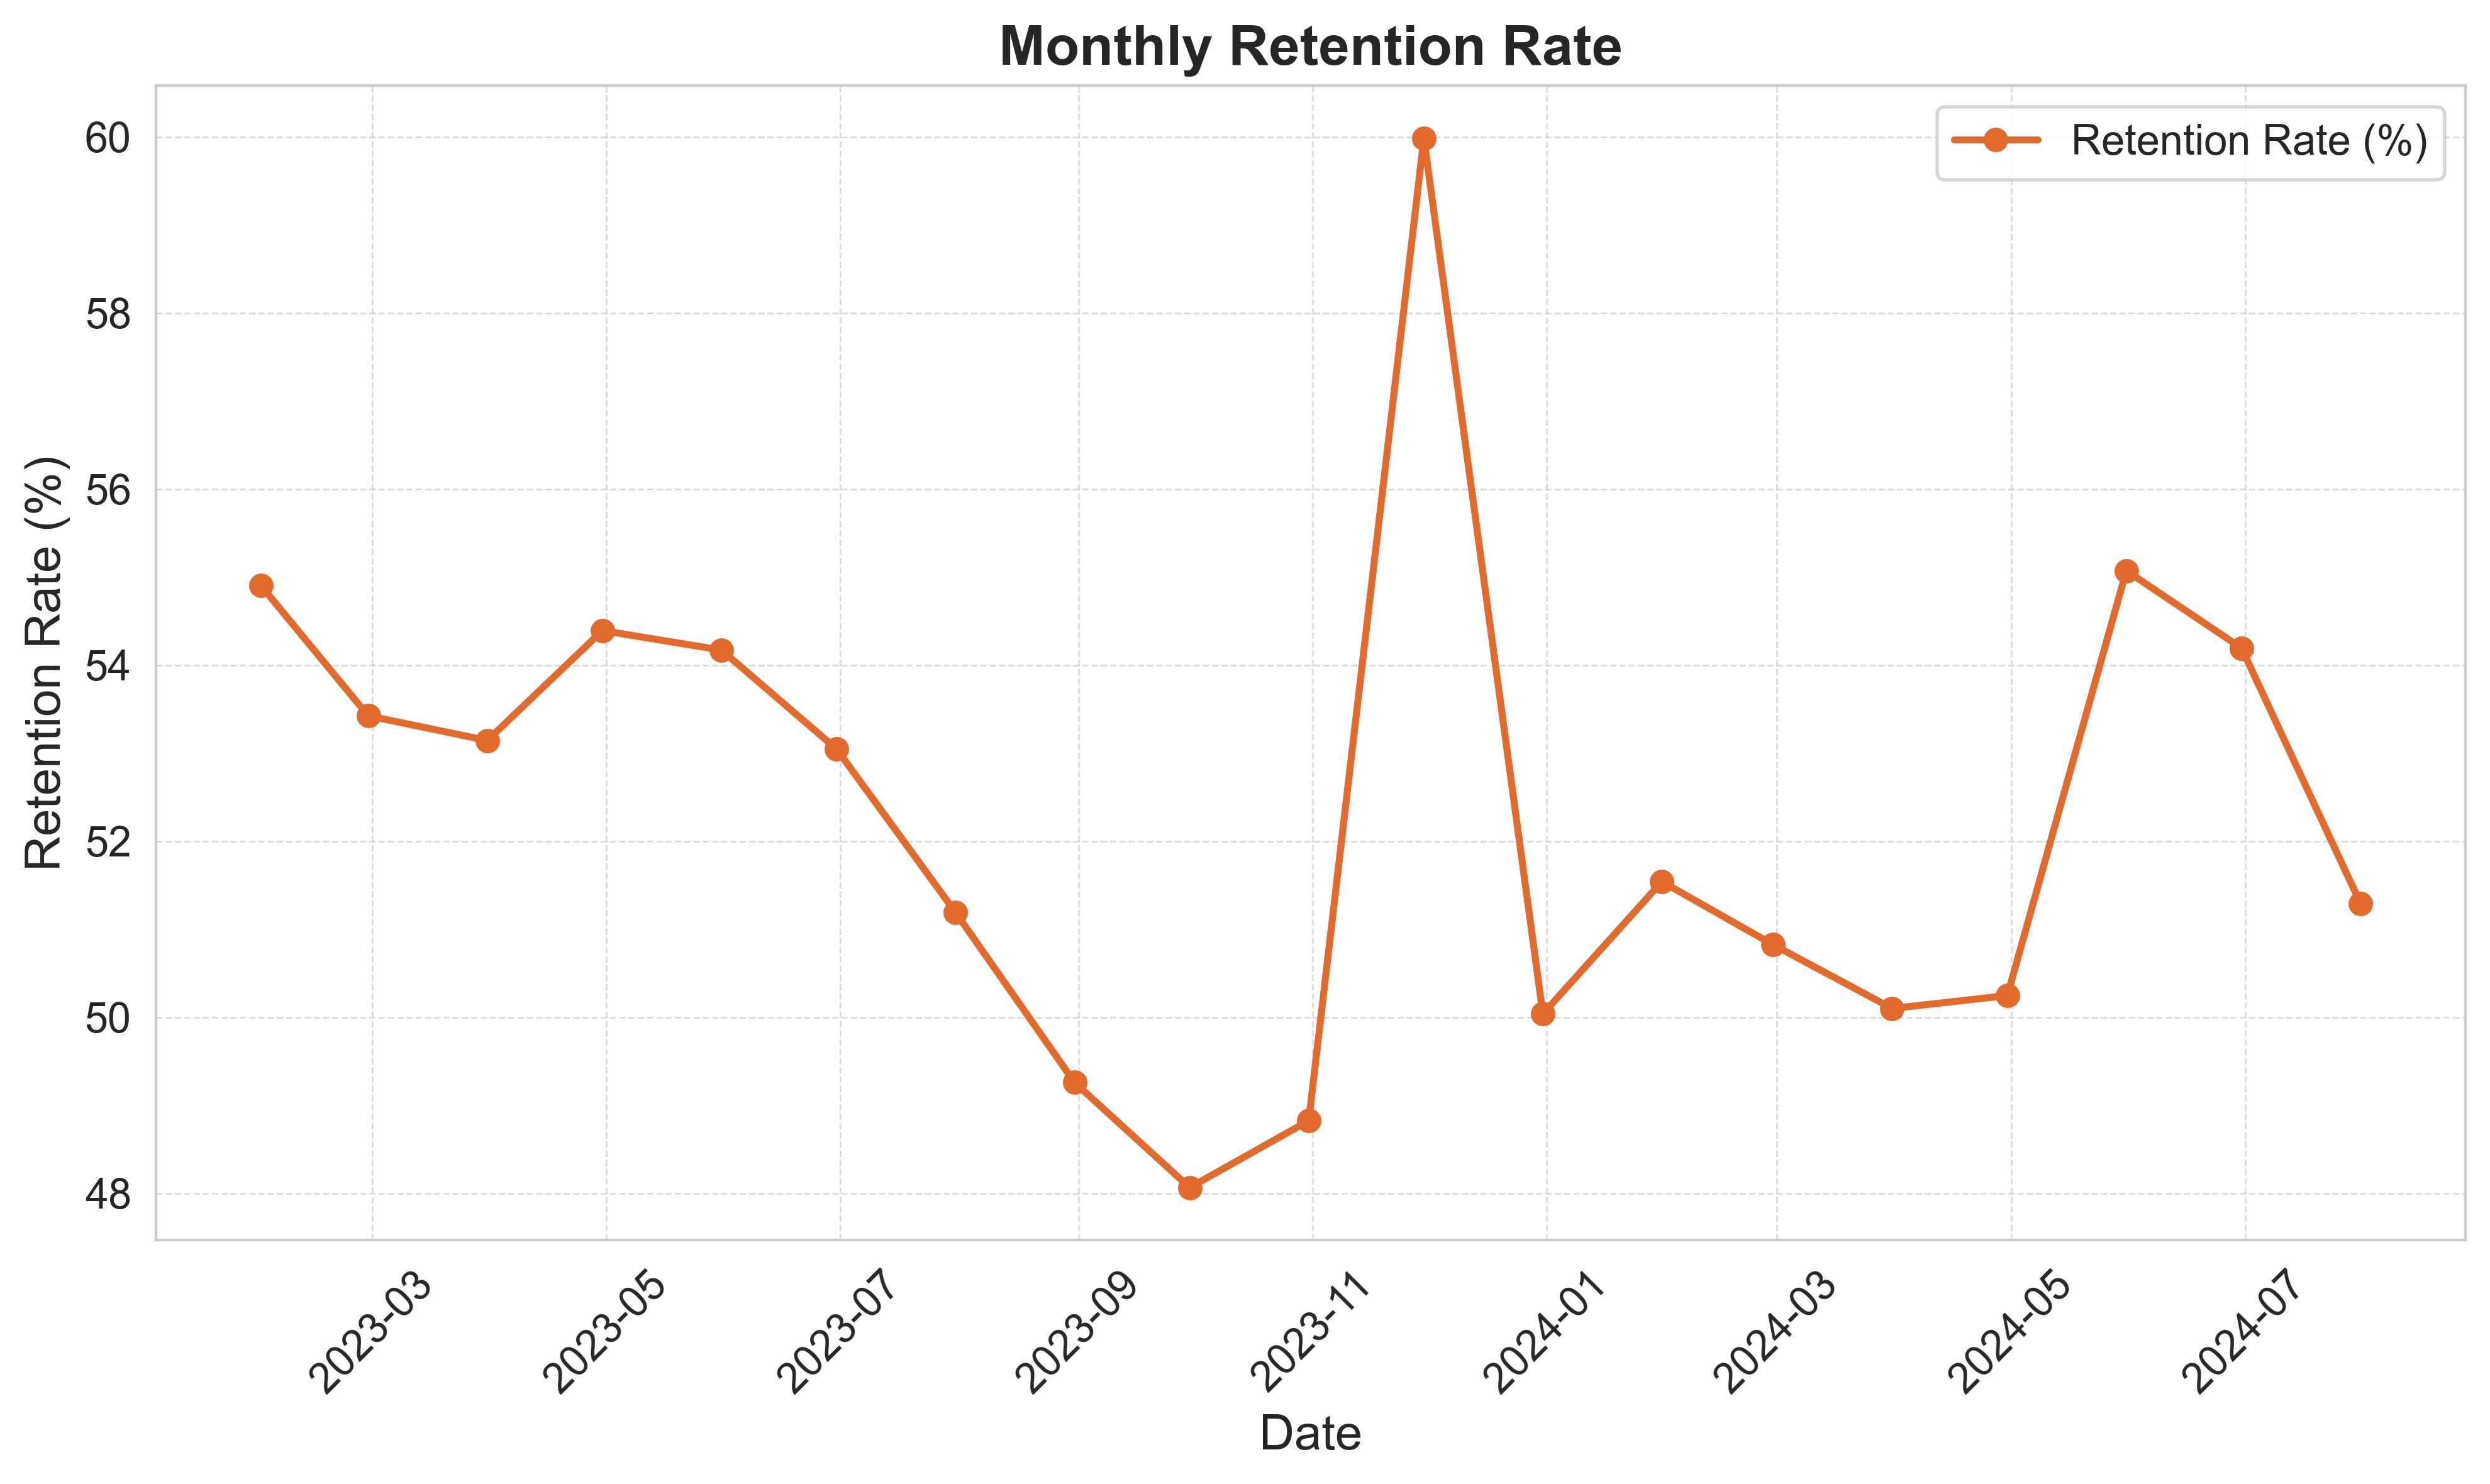

In [ ]:
monthly_retention = data_cleaned.resample('M', on='Date')['Retention'].mean().reset_index()
monthly_retention['Retention Rate'] = monthly_retention['Retention'] * 100

# Plot the monthly retention rate
plt.figure(figsize=(10, 6), facecolor='#FFFFFF')
plt.plot(monthly_retention['Date'], monthly_retention['Retention Rate'],
         marker='o', color='#E26A2C', markersize=6, linewidth=2, label='Retention Rate (%)')

# Title and labels
plt.title('Monthly Retention Rate', fontsize=16, weight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Retention Rate (%)', fontsize=14)

# Customize grid
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Enhance ticks
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Add a legend
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


## insight:
Notable Spike: There is a significant spike in the retention rate in December 2023, indicating effective customer retention strategies or promotional activities during that month.
## recommendation:
Investigate December Strategies: Analyze any marketing campaigns, product launches, or customer engagement strategies implemented in December 2023 that may have contributed to this spike in retention.
Replicate Success: Identify key factors from December's success that can be replicated in future months to maintain or improve retention rates.